Building a decision tree, using cross validation to prune a tree, evaluating the tree performanceby Hossein Basereh Taramsari

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Step 1: Read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [2]:
# Load the data
df = pd.read_csv('Titanic.csv')
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [3]:
# Pre-processing the data
def preprocess_dataframe(df):
    df['age'] = df['age'].fillna(df['age'].mean())
    df['fare'] = df['fare'].fillna(df['fare'].mean())
    df['embarked'] = df['embarked'].fillna(df['embarked'].value_counts().idxmax())
#     df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])
    return df


df = preprocess_dataframe(df)


In [4]:
# Checking if ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no)

df['survived'].unique()

array([1, 0], dtype=int64)

In [5]:
# Mapping categorical into numerical

df['pclass'].unique(),df['sex'].unique(),df['sibsp'].unique()
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [6]:
# Spliting the dataset into train and test sets

X = df[['pclass', 'sex', 'age', 'sibsp']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

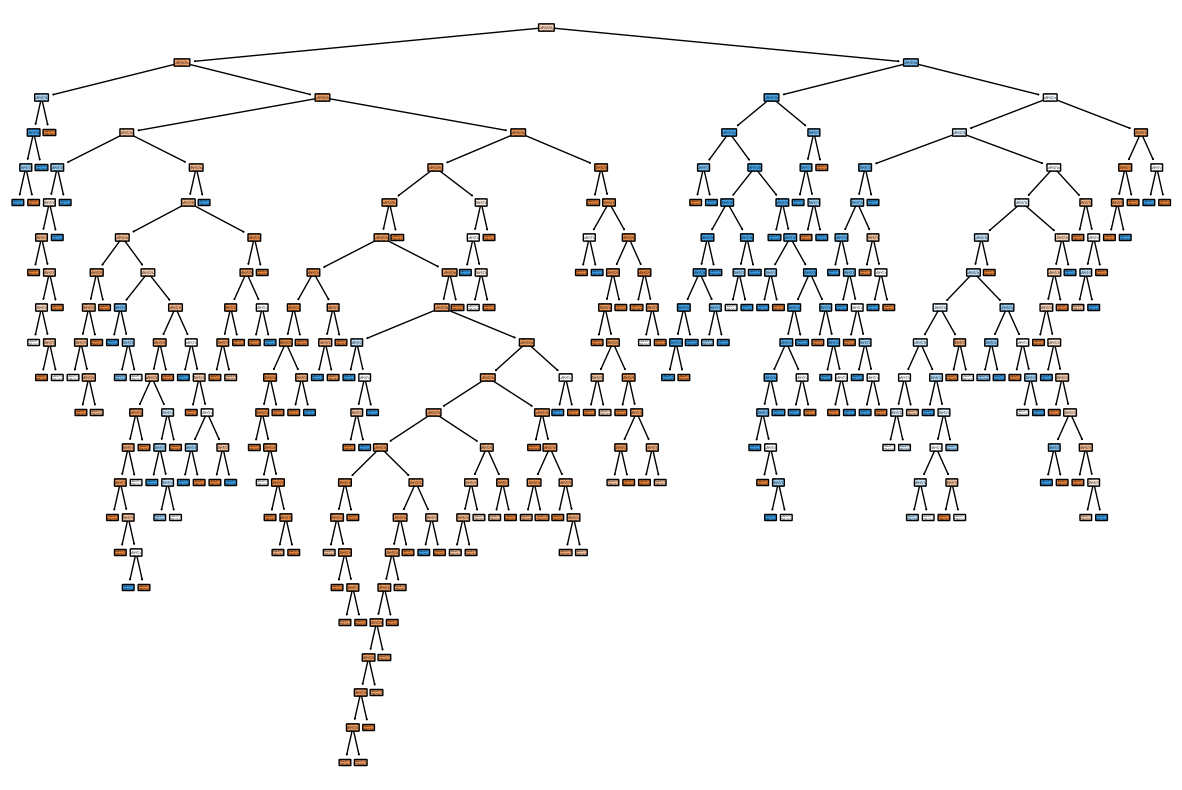

In [7]:
# Fitting 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Plot
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()

### Step 3: Use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis.

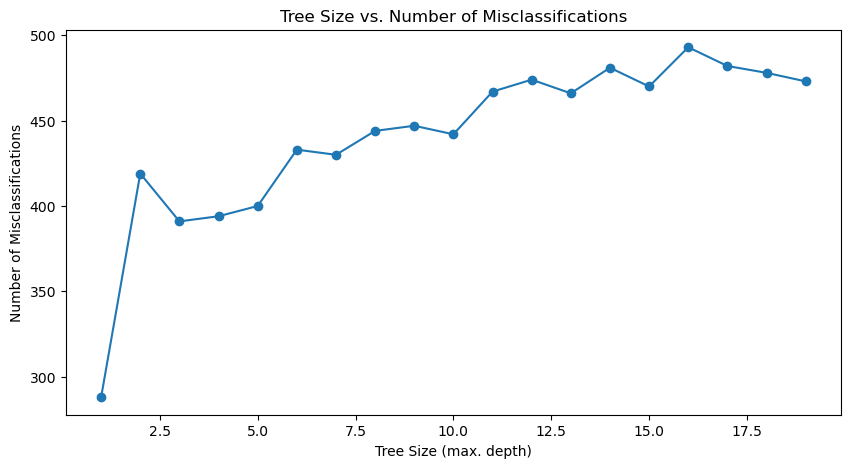

Best maximum depth: 3


In [8]:
# Range of depth to test
param_grid = {'max_depth': np.arange(1, 20)}

# DecisionTreeClassifier
clf = DecisionTreeClassifier()

# GridSearchCV for cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

# Number of misclassifications
misclassification_counts = []

for depth in param_grid['max_depth']:
    clf = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    misclassification_count = int((1 - np.mean(cv_scores)) * len(y))  
    misclassification_counts.append(misclassification_count)

# Plot number of misclassifications vs tree size
plt.figure(figsize=(10, 5))
plt.plot(param_grid['max_depth'], misclassification_counts, marker='o')
plt.title('Tree Size vs. Number of Misclassifications')
plt.xlabel('Tree Size (max. depth)')
plt.ylabel('Number of Misclassifications')
plt.show()

# Best maximum depth
print("Best maximum depth:", best_max_depth)

### Step 4: Find the tree size that yields a minimum number of misclassifications. Choose the optimal tree size to prune the tree and plot the pruned tree (which shall be smaller than the tree you obtained in Step 2). Report the accuracy of pruned tree on the test set for the following: 1.percent survivors correctly predicted (on test set) 2.percent fatalities correctly predicted (on test set)

In [9]:
# Repeated from previous step
# Range
param_grid = {'max_depth': np.arange(1, 20)}

# DecisionTreeClassifier
clf = DecisionTreeClassifier()

# GridSearchCV for cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')  # Use accuracy as the scoring metric
grid_search.fit(X_train, y_train)

# Best Max Depth
best_max_depth = grid_search.best_params_['max_depth']

# Minimum misclassification 
min_misclassification_count = float('inf')
best_tree_size = None

# Iteration
for depth in param_grid['max_depth']:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test) 
    misclassification_count = (y_test != y_pred).sum()  
    
    # Check
    if misclassification_count < min_misclassification_count:
        min_misclassification_count = misclassification_count
        best_tree_size = depth

print("Tree size that yields the minimum misclassifications:", best_tree_size)
print("Minimum misclassification count:", min_misclassification_count)



Tree size that yields the minimum misclassifications: 3
Minimum misclassification count: 86


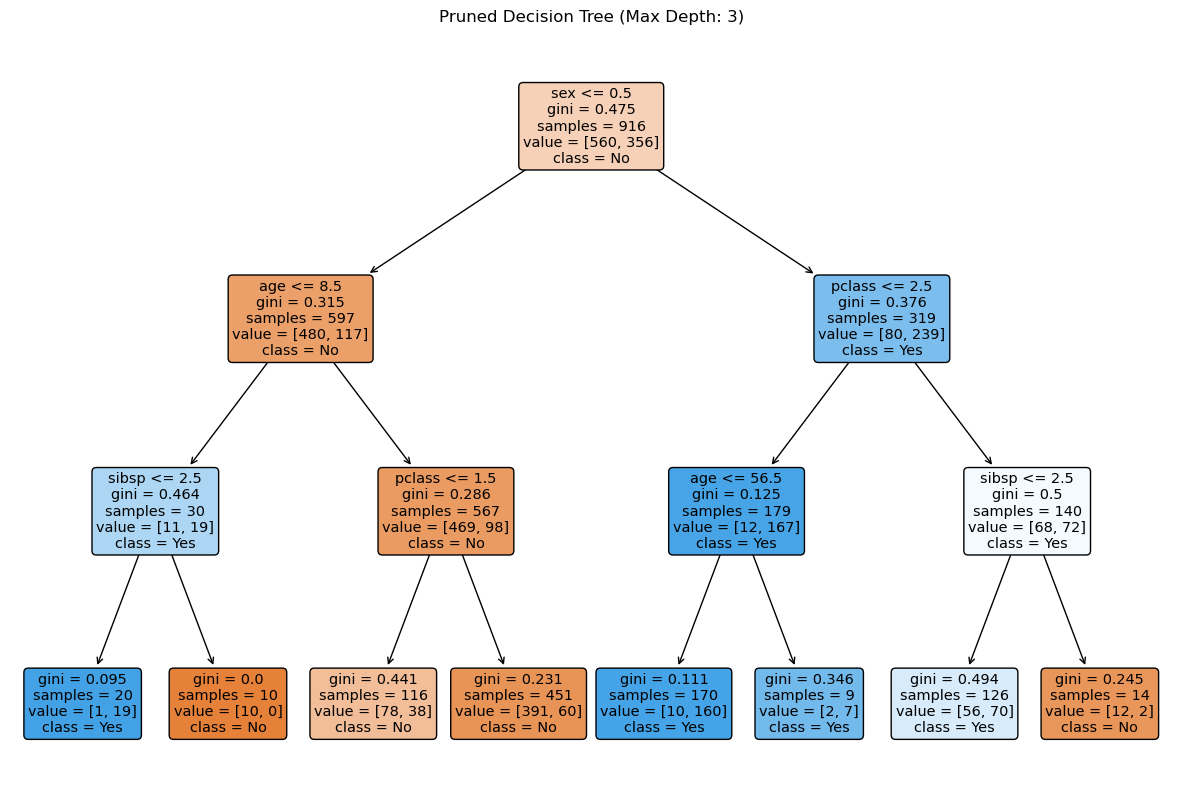

In [10]:
# Optimal tree size for pruning
optimal_max_depth = best_tree_size

# New DecisionTreeClassifier
pruned_tree = DecisionTreeClassifier(max_depth=optimal_max_depth)

# Fitting
pruned_tree.fit(X_train, y_train)

# Plot 
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title(f'Pruned Decision Tree (Max Depth: {optimal_max_depth})')
plt.show()


In [11]:
# Predictions - pruned tree
y_pred = pruned_tree.predict(X_test)

# Accuracy
survivors_correct = (y_pred[y_test == 1] == 1).sum()
fatalities_correct = (y_pred[y_test == 0] == 0).sum()

# Total
total_survivors = (y_test == 1).sum()
total_fatalities = (y_test == 0).sum()

# Correct predictions - percentages 
percent_survivors_correct = (survivors_correct / total_survivors) * 100
percent_fatalities_correct = (fatalities_correct / total_fatalities) * 100

print("Percent survivors correctly predicted (on test set): {:.2f}%".format(percent_survivors_correct))
print("Percent fatalities correctly predicted (on test set): {:.2f}%".format(percent_fatalities_correct))

# Overall accuracy
total_correct_predictions = survivors_correct + fatalities_correct
total_samples = len(y_test)
overall_accuracy = (total_correct_predictions / total_samples) * 100

print("Overall Accuracy of the Pruned Decision Tree on the Test Set: {:.2f}%".format(overall_accuracy))



Percent survivors correctly predicted (on test set): 70.14%
Percent fatalities correctly predicted (on test set): 82.73%
Overall Accuracy of the Pruned Decision Tree on the Test Set: 78.12%


### Step 5: Use the RandomForestClassifier() function to train a random forest using the optimal tree size you found in Step 4. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following: 1.percent survivors correctly predicted (on test set) 2.percent fatalities correctly predicted (on test set)

In [12]:
# Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, max_depth=optimal_max_depth, random_state=42)

# Fit 
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [13]:
# Predictions 
rf_y_pred = random_forest.predict(X_test)

# Accuracy
rf_survivors_correct = (rf_y_pred[y_test == 1] == 1).sum()
rf_fatalities_correct = (rf_y_pred[y_test == 0] == 0).sum()

# Total
total_survivors = (y_test == 1).sum()
total_fatalities = (y_test == 0).sum()

# Correct predictions - percentages (Random Forest)
rf_percent_survivors_correct = (rf_survivors_correct / total_survivors) * 100
rf_percent_fatalities_correct = (rf_fatalities_correct / total_fatalities) * 100

print("Percent survivors correctly predicted (on test set) by Random Forest: {:.2f}%".format(rf_percent_survivors_correct))
print("Percent fatalities correctly predicted (on test set) by Random Forest: {:.2f}%".format(rf_percent_fatalities_correct))

# Overall accuracy - Random Forest 
total_correct_predictions = rf_survivors_correct + rf_fatalities_correct
total_samples = len(y_test)
overall_accuracy = (total_correct_predictions / total_samples) * 100

print("Overall Accuracy of the Random Forest on the Test Set: {:.2f}%".format(overall_accuracy))

Percent survivors correctly predicted (on test set) by Random Forest: 69.44%
Percent fatalities correctly predicted (on test set) by Random Forest: 83.13%
Overall Accuracy of the Random Forest on the Test Set: 78.12%


### Check whether there is improvement as compared to a single tree obtained in Step 4. If not, please discuss the potential reasons.

In [14]:
# Pruned decision tree
pruned_tree_accuracy = accuracy_score(y_test, pruned_tree.predict(X_test))

# Random Forest 
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test))

print("Accuracy of the Pruned Decision Tree on Test Set: {:.2f}%".format(pruned_tree_accuracy * 100))
print("Accuracy of the Random Forest on Test Set: {:.2f}%".format(random_forest_accuracy * 100))


Accuracy of the Pruned Decision Tree on Test Set: 78.12%
Accuracy of the Random Forest on Test Set: 78.12%


The pruned decision tree outperforms the Random Forest model in correctly predicting survivors, achieving an accuracy of 70.14% compared to the Random Forest's 69.44%. However, the Random Forest excels in predicting fatalities with an accuracy of 83.13%, while the decision tree achieves 82.73%. In terms of overall accuracy, both the pruned decision tree and the Random Forest demonstrate consistent performance, with an overall accuracy of 78.12%. This indicates that while the decision tree is better at predicting survivors, the Random Forest offers superior performance in predicting fatalities. The difference in their strengths may be attributed to the randomness introduced by the Random Forest method. It should be noted that everytime we run the model we get different results so the accuracies and best max tree sizes are not fixed and may change for each run.